## Importing Necessary Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [23]:
seeds = pd.read_csv('seeds.csv')

features = seeds[seeds.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
152,12.26,13.60,0.8333,5.408,2.833,4.756
20,14.16,14.40,0.8584,5.658,3.129,3.072
204,12.37,13.47,0.8567,5.204,2.960,3.919
104,18.95,16.42,0.8829,6.248,3.755,3.368
71,16.84,15.67,0.8623,5.998,3.484,4.675
65,12.88,13.50,0.8879,5.139,3.119,2.352
201,12.67,13.32,0.8977,4.984,3.135,2.300
147,12.49,13.46,0.8658,5.267,2.967,4.421
203,12.70,13.41,0.8874,5.183,3.091,8.456
136,17.36,15.76,0.8785,6.145,3.574,3.526


* As you can see, there are 6 features for each instance of a seed.
* So, you can interpret these as coordinates that describe each instance's location in a 6-dimension space.

* Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot.

* So we'll take advantage of a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[seeds.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

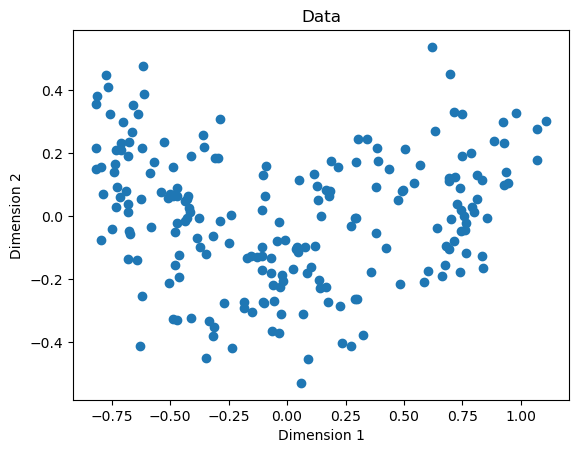

In [28]:
plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

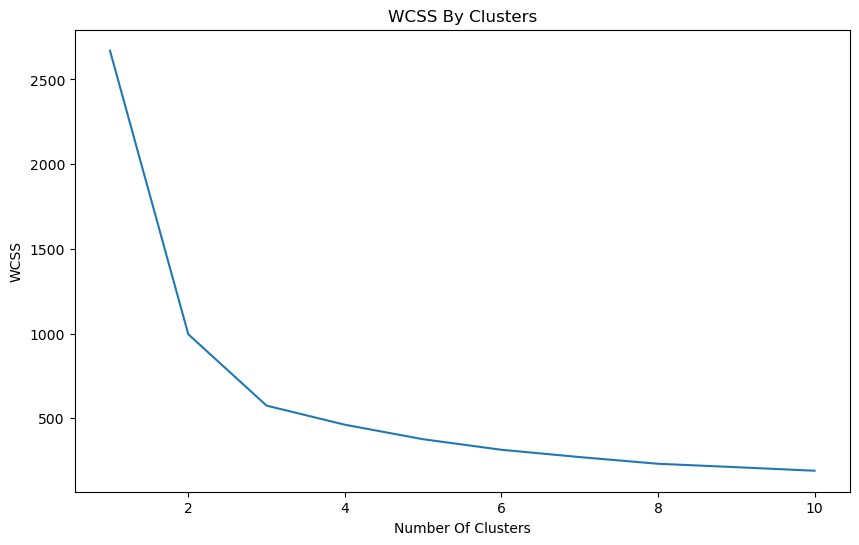

In [31]:
from sklearn.cluster import KMeans

# Create 10 models with 1 to 10 clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    
    # Get the WCSS (inertia) Value
    wcss.append(kmeans.inertia_)
    
    
# Plot the WCSS values onto a line graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('WCSS By Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

* The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

In [32]:
# Create a model based on 3 Centroids
model =KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

# Fit the data and predict the cluster assingment for each data point
km_clusters = model.fit_predict(features.values)

# View the cluster assingments
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

## Cluster Assignments with 2-D data points

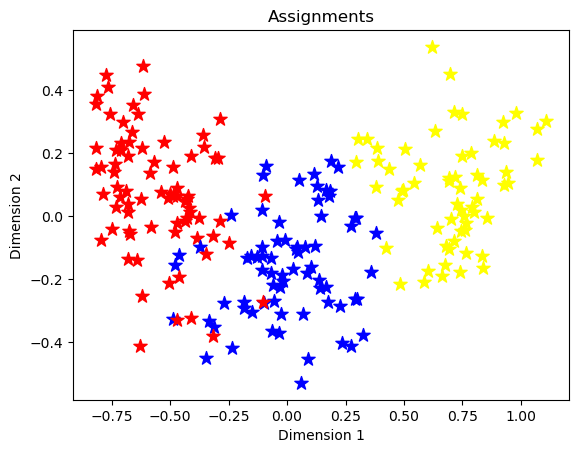

In [44]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'yellow', 2:'red'}
    mrk_dic = {0:'*', 1: '*', 2: '*'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1],
                    color=colors[sample], marker = markers[sample], s=100)
    plt.title('Assignments')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()    
    
plot_clusters(features_2d, km_clusters)

Hopefully, the data has been separated into three distinct clusters.

So what's the practical use of clustering? In some cases, you may have data that you need to group into distinct clusters without knowing how many clusters there are or what they indicate. For example, a marketing organization might want to separate customers into distinct segments, and then investigate how those segments exhibit different purchasing behaviors.

Sometimes, clustering is used as an initial step towards creating a classification model. You start by identifying distinct groups of data points, and then assign class labels to those clusters. You can then use this labelled data to train a classification model.

In the case of the seeds data, the different species of seed are already known and encoded as 0 (*Kama*), 1 (*Rosa*), or 2 (*Canadian*), so we can use these identifiers to compare the species classifications to the clusters identified by our unsupervised algorithm.

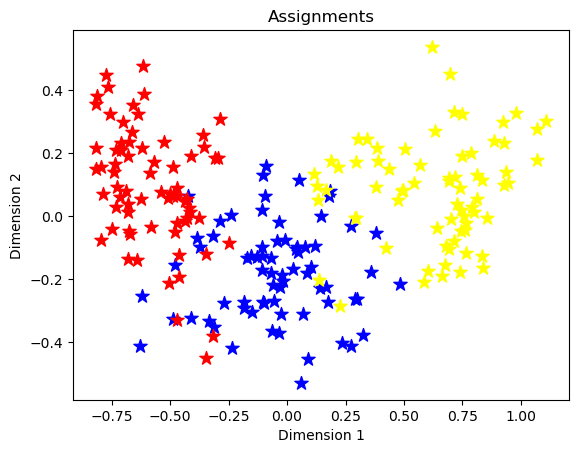

In [45]:
seed_species = seeds[seeds.columns[7]]
plot_clusters(features_2d, seed_species.values)

There may be some differences between the cluster assignments and class labels, but the K-Means model should have done a reasonable job of clustering the observations so that seeds of the same species are generally in the same cluster.

## Agglomerative Clustering

In [42]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

#### So what does Agglomerative Clustering look like?

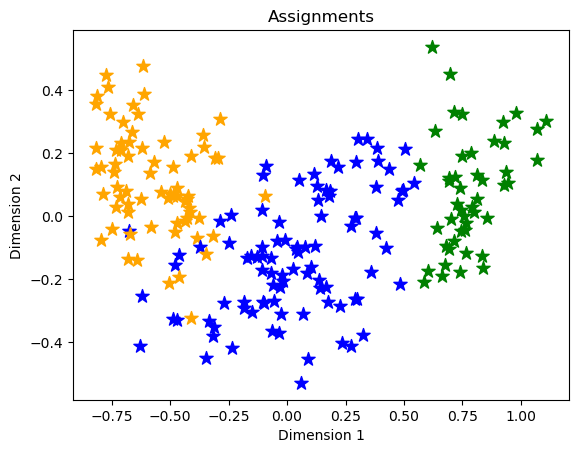

In [43]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'*',2:'*'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)

## Further Reading

https://scikit-learn.org/stable/modules/clustering.html